In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pathYesTumor = '/content/drive/MyDrive/Soft Computing Project/yesTumor'
pathNoTumor = '/content/drive/MyDrive/Soft Computing Project/noTumor'

In [4]:
print(len(os.listdir(pathYesTumor)))
print(len(os.listdir(pathNoTumor)))

156
99


# **Augmented Tumor Image**

In [5]:
# pip install Augmentor

In [6]:
# import Augmentor
# p = Augmentor.Pipeline('/content/drive/MyDrive/Soft Computing Project/yesTumor')
# p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
# p.flip_left_right(probability=0.5)
# p.zoom_random(probability=0.5, percentage_area=0.8)
# p.flip_top_bottom(probability=0.5)
# p.sample(930)

In [7]:
pathYes_output = '/content/drive/MyDrive/Soft Computing Project/yesTumor/output'
pathNo_output = '/content/drive/MyDrive/Soft Computing Project/noTumor/output'

In [8]:
len(os.listdir(pathYes_output))

930

# **AUGMENTED NO TUMOR IMAGE**

In [9]:
# p = Augmentor.Pipeline('/content/drive/MyDrive/Soft Computing Project/noTumor')
# p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
# p.flip_left_right(probability=0.5)
# p.zoom_random(probability=0.5, percentage_area=0.8)
# p.flip_top_bottom(probability=0.5)
# p.sample(882)

In [10]:
len(os.listdir(pathNo_output))

882

# **Dataset Make**

In [11]:
#Tumor data(original+AUGData)
data = []
paths = []
result = []
count = 0

for r, d, f in os.walk(r'/content/drive/MyDrive/Soft Computing Project/yesTumor'):
    for file in f:
        if '.jpg' in file:
            count = count + 1
            paths.append(os.path.join(r, file))
       
for path in paths:
    img = Image.open(path)
    img = img.resize((240, 240))
    img = np.array(img)
    img = img.astype('float32')
    img /= 255.0
    data.append(np.array(img))
    result.append(1)

In [12]:
count

1085

In [13]:
#no Tumor data(original+AUGData)
count = 0
paths = []
for r, d, f in os.walk(r'/content/drive/MyDrive/Soft Computing Project/noTumor'):
    for file in f:
        if '.jpg' in file:
            count = count + 1
            paths.append(os.path.join(r, file))
       
for path in paths:
    img = Image.open(path)
    img = img.resize((240, 240))
    img = np.array(img)
    img = img.astype('float32')
    img /= 255.0
    data.append(np.array(img))
    result.append(0)

In [14]:
count

980

In [15]:
data = np.array(data)
data.shape

(2065, 240, 240, 3)

In [16]:
len(data)

2065

In [17]:
result = np.array(result)
result = result.reshape(2065,1)

In [18]:
result

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(data, result,test_size=0.15, shuffle=True, random_state=5)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.15, shuffle=True, random_state=5)

In [20]:
len(y_train),len(y_test),len(y_valid)

(1491, 310, 264)

In [21]:
np.array(np.unique(y_test, return_counts=True)).T

array([[  0, 136],
       [  1, 174]])

In [22]:
np.array(np.unique(y_train, return_counts=True)).T

array([[  0, 719],
       [  1, 772]])

In [23]:
np.array(np.unique(y_valid, return_counts=True)).T

array([[  0, 125],
       [  1, 139]])

In [24]:
x_train = tf.convert_to_tensor(x_train, np.float32)
y_train = tf.convert_to_tensor(y_train, np.float32)
x_test = tf.convert_to_tensor(x_test, np.float32)
y_test = tf.convert_to_tensor(y_test, np.float32)
x_valid = tf.convert_to_tensor(x_valid, np.float32)
y_valid = tf.convert_to_tensor(y_valid, np.float32)

In [25]:
y_test

<tf.Tensor: shape=(310, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
 

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  activation ='relu',input_shape=(240,240,3),padding='same'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2), strides=(4,4)))
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=(3, 3),  activation ='relu',input_shape=(240,240,3),padding='same'))
model.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model.add(Dropout(0.3))

model.add(Conv2D(30, kernel_size=(3, 3),  activation ='relu',input_shape=(240,240,3),padding='same'))
model.add(MaxPooling2D(pool_size=(4,4), strides=(4,4)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
opt = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])



In [27]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 32, verbose =1,validation_data = (x_valid, y_valid))


Epoch 1/40
47/47 [==============================] - 76s 2s/step - loss: 0.7016 - accuracy: 0.5399 - val_loss: 0.6813 - val_accuracy: 0.6553
Epoch 2/40
47/47 [==============================] - 74s 2s/step - loss: 0.6367 - accuracy: 0.6533 - val_loss: 0.6411 - val_accuracy: 0.7083
Epoch 3/40
47/47 [==============================] - 74s 2s/step - loss: 0.5782 - accuracy: 0.6888 - val_loss: 0.5834 - val_accuracy: 0.7538
Epoch 4/40
47/47 [==============================] - 74s 2s/step - loss: 0.5194 - accuracy: 0.7478 - val_loss: 0.5676 - val_accuracy: 0.7311
Epoch 5/40
47/47 [==============================] - 74s 2s/step - loss: 0.5107 - accuracy: 0.7525 - val_loss: 0.5802 - val_accuracy: 0.6591
Epoch 6/40
47/47 [==============================] - 74s 2s/step - loss: 0.4873 - accuracy: 0.7659 - val_loss: 0.5320 - val_accuracy: 0.7917
Epoch 7/40
47/47 [==============================] - 73s 2s/step - loss: 0.4874 - accuracy: 0.7686 - val_loss: 0.6350 - val_accuracy: 0.6023
Epoch 8/40
47/47 [==

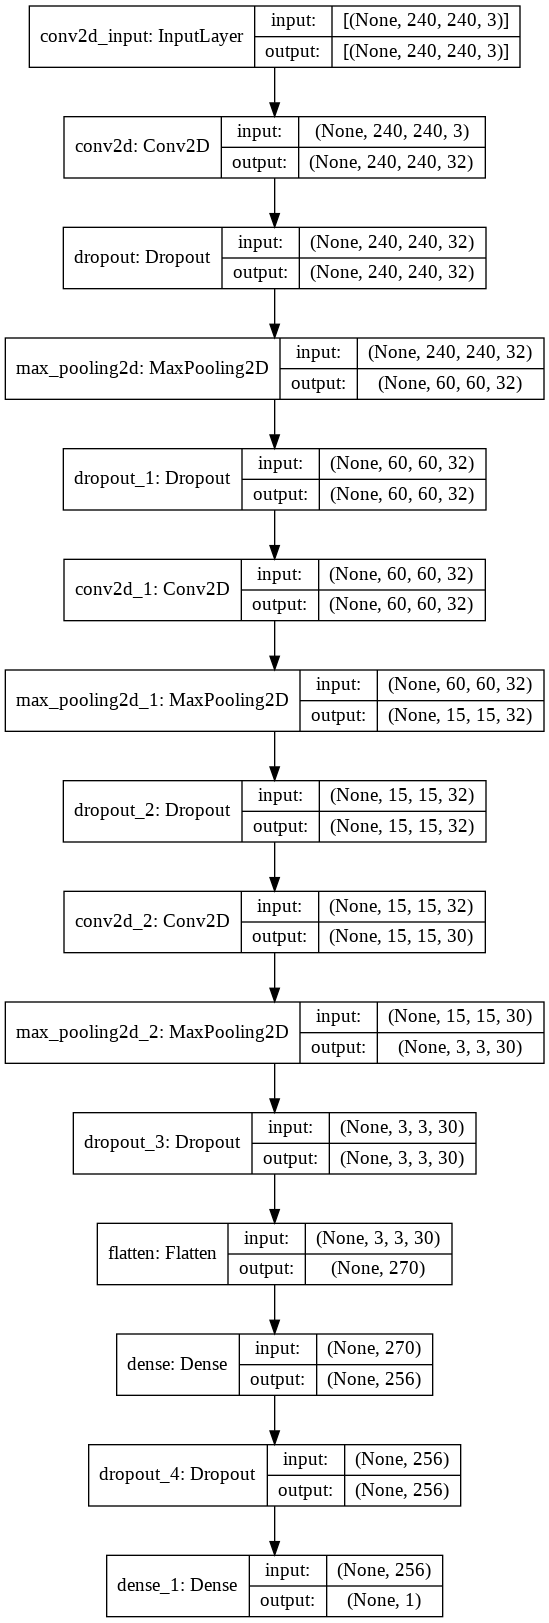

In [28]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [29]:
history.history

{'accuracy': [0.5399060845375061,
  0.6532528400421143,
  0.6887994408607483,
  0.747820258140564,
  0.7525150775909424,
  0.7659289240837097,
  0.7686116695404053,
  0.797451376914978,
  0.7927565574645996,
  0.797451376914978,
  0.8175721168518066,
  0.8075117468833923,
  0.8283031582832336,
  0.8423876762390137,
  0.838363528251648,
  0.8544601202011108,
  0.8625083565711975,
  0.8725687265396118,
  0.8765928745269775,
  0.8752515316009521,
  0.8933601379394531,
  0.8926894664764404,
  0.9040912389755249,
  0.8873239159584045,
  0.8980550169944763,
  0.902079164981842,
  0.9054325819015503,
  0.9101274609565735,
  0.9215291738510132,
  0.9208585023880005,
  0.9215291738510132,
  0.9322602152824402,
  0.9255533218383789,
  0.9329309463500977,
  0.9389671087265015,
  0.9369550347328186,
  0.9349430203437805,
  0.9423205852508545,
  0.9456740617752075,
  0.9543930292129517],
 'loss': [0.7016099691390991,
  0.6366840600967407,
  0.5782208442687988,
  0.5193782448768616,
  0.510719060897

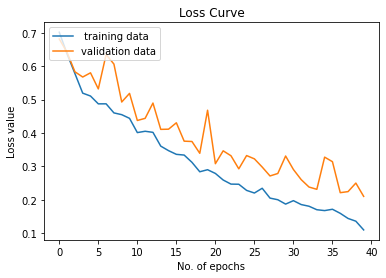

In [30]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss Curve')
plt.ylabel('Loss value')
plt.xlabel('No. of epochs')
plt.legend(loc="upper left")
plt.show()

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 240, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 240, 240, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0

In [32]:
y_predict = (model.predict(x_test) > 0.5).astype("int32")

In [33]:
y_predict

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [34]:
accuracy_score(y_test,y_predict)

0.9129032258064517

In [35]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       136
         1.0       0.93      0.91      0.92       174

    accuracy                           0.91       310
   macro avg       0.91      0.91      0.91       310
weighted avg       0.91      0.91      0.91       310



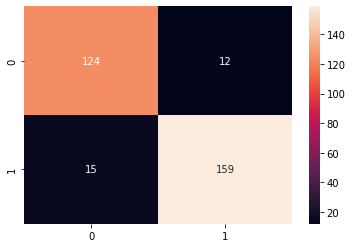

In [36]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predict)
import seaborn as sns
sns.heatmap(cf_matrix, fmt='d',annot=True)